In [2]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, labs, scale_y_continuous, theme, element_text
import plotly.express as px

In [3]:
main_dir = "C:/Users/TooFastDan/Documents/MD_PhD Application/Nonprofit"

In [6]:
# Importing and processing the df
usnews = pd.read_excel(main_dir+"/US News Rankings/hist_med_school_rank.xlsx", sheet_name="data", index_col=0)
all_cols = list(usnews.columns)
filt_cols = [y for y in all_cols if isinstance(y, int)]  # filtering for only integer columns with year numbers
usnews = usnews[filt_cols]
usnews = usnews.replace(".", np.nan)
usnews = usnews.reset_index()
usnews = usnews.rename(columns={"index": "school"})

# Renaming things to be consistent with AAMC data
usnews["school"] = usnews["school"].replace({
    "Hopkins": "Johns Hopkins",
    "WashU": "Washington U St Louis",
    "Penn": "Pennsylvania-Perelman",
    "UCSF": "UC San Francisco",
    "Columbia": "Columbia-Vagelos",
    "Cornell": "Cornell-Weill",
    "UCLA": "UCLA-Geffen",
    "Vandy": "Vanderbilt",
    "UCSD": "UC San Diego",
    "Pitt": "Pittsburgh",
    "Northwestern": "Northwestern-Feinberg",
    "Chicago": "Chicago-Pritzker",
    "UNC-CH": "North Carolina",
    "Case": "Case Western Reserve",
    "U Alabama": "Alabama",
    "U Iowa": "Iowa-Carver",
    "UVA": "Virginia",
    "NYU": "NYU-Grossman",
    "Sinai": "Mount Sinai-Icahn",
    "BU": "Boston",
    "U Colorado": "Colorado",
    "U Oregon": "Oregon",
    "Dartmouth": "Dartmouth-Geisel",
    "USC": "Southern Cal-Keck",
    "OSU": "Ohio State",
    "U Minn - TC": "Minnesota",
    "IU - Indianapolis": "Indiana",
    "Brown": "Brown-Alpert",
    "UF": "Florida",
    "U Utah": "Utah",
    "U Kentucky": "Kentucky",
    "Jefferson": "Jefferson-Kimmel",
    "Med Col Wisco": "MC Wisconsin",
    "U Mass - Worch": "Massachusetts",
    "U Miami": "Miami-Miller",
    "Stony Brook": "Renaissance Stony Brook",
    "Temple": "Temple-Katz",
    "U Illinois": "Illinois",
    "USF": "USF-Morsani"
})

# Melting to make it graphable
usnews = usnews.melt(id_vars="school", value_vars=usnews.columns[1:], var_name="year", value_name="rank")
usnews

school  year  rank
0                     Harvard  2000   1.0
1               Johns Hopkins  2000   2.0
2       Washington U St Louis  2000   4.0
3                        Duke  2000   6.0
4       Pennsylvania-Perelman  2000   3.0
...                       ...   ...   ...
1352                   Tulane  2022   NaN
1353  Renaissance Stony Brook  2022   NaN
1354              Temple-Katz  2022   NaN
1355                 Illinois  2022   NaN
1356              USF-Morsani  2022  48.0

[1357 rows x 3 columns]

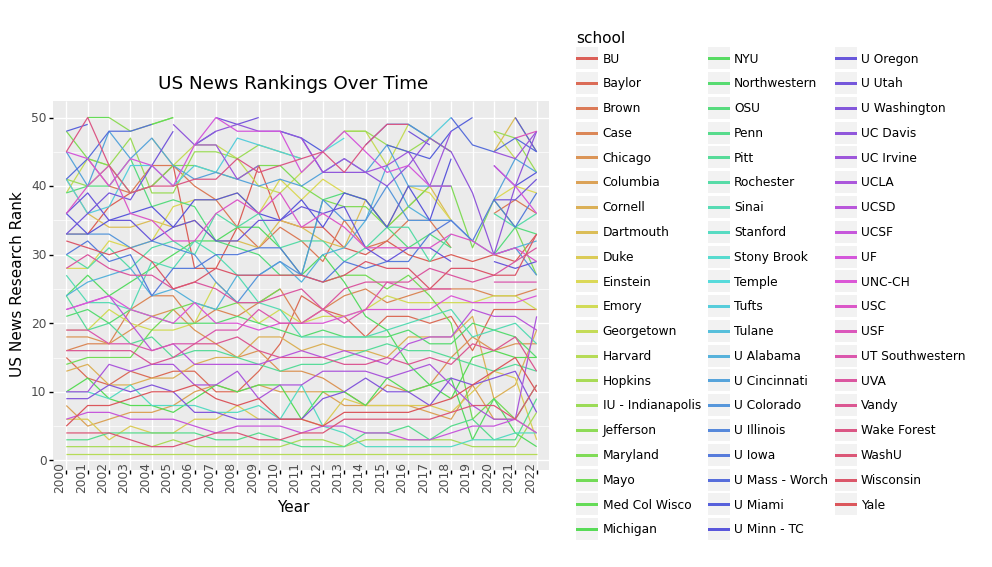

<ggplot: (173210740234)>

In [5]:
(ggplot(data=usnews, mapping = aes(x="year", y="rank", group="school", color="school")) +
 geom_line() +
 labs(x="Year", y="US News Research Rank", title="US News Rankings Over Time") +
 theme(axis_text_x = element_text(angle = 90, vjust = 0.5, hjust=1)))

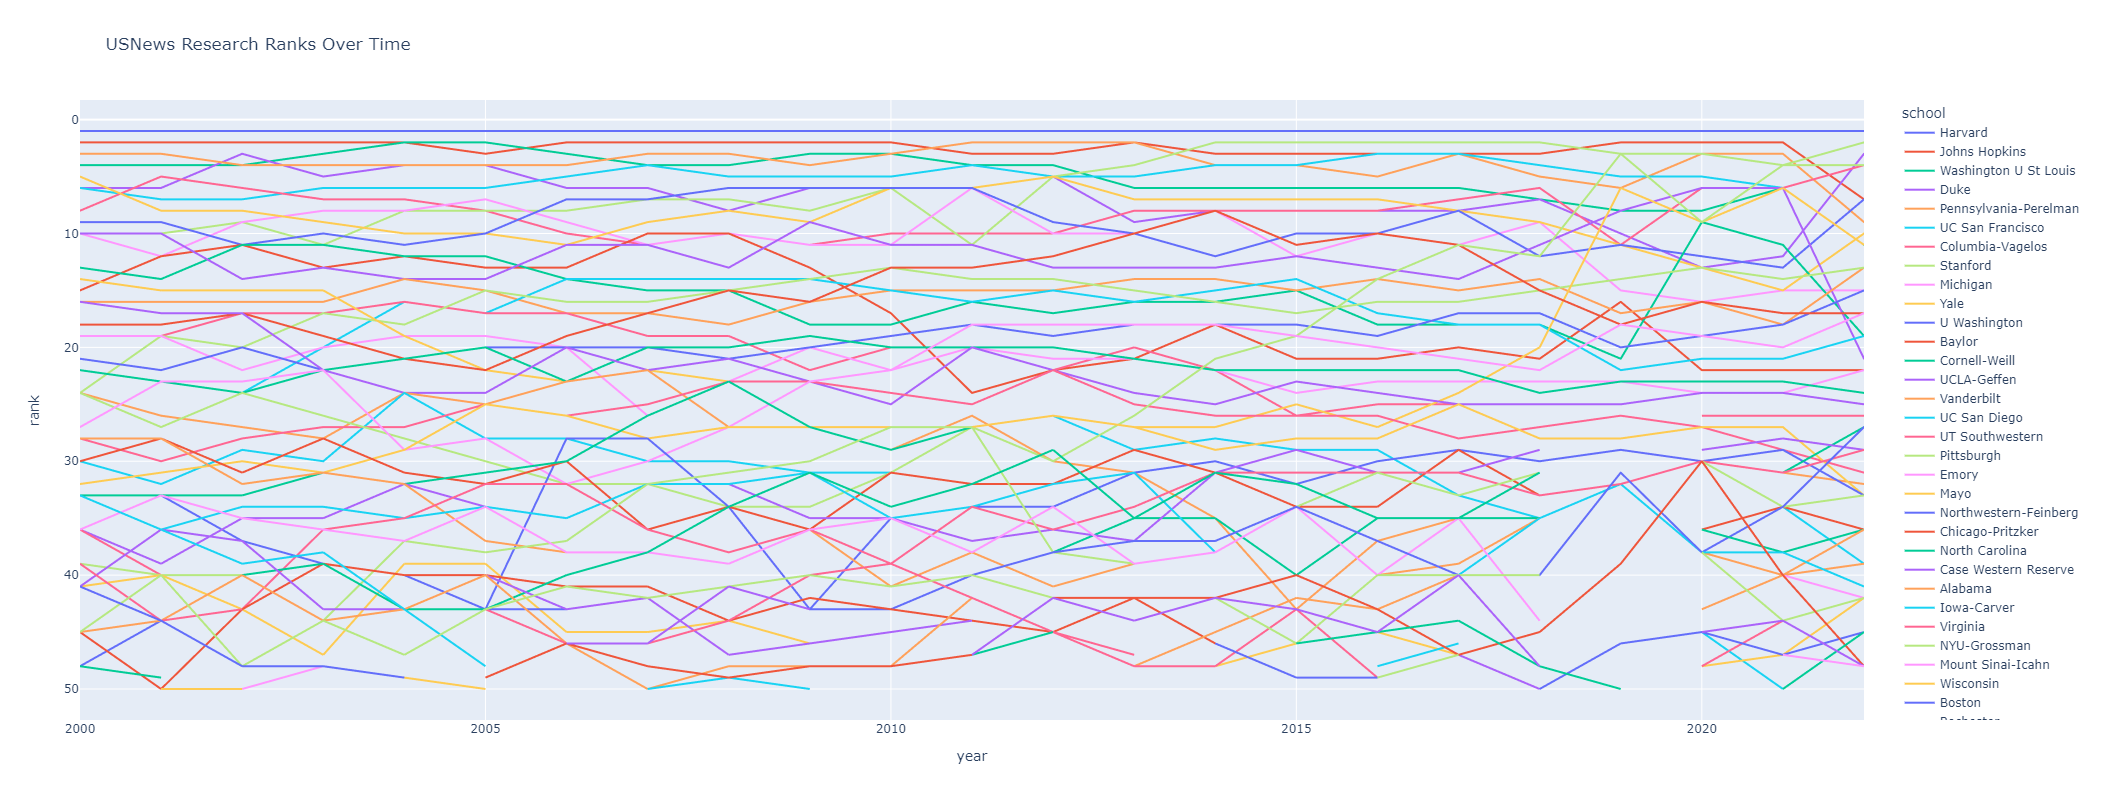

In [7]:
fig = px.line(data_frame=usnews, x="year", y="rank", line_group="school", color="school", title="USNews Research Ranks Over Time", width=1300, height=800)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()